# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
response_data_btc = requests.get(btc_url).json()
##print(json.dumps(response_data_btc , indent=4))
btc_value = response_data_btc["data"]["1"]["quotes"]["CAD"]["price"]
btc_value

# Fetch current ETH price
response_data_eth = requests.get(eth_url).json()
##print(json.dumps(response_data_eth , indent=4))
eth_value = response_data_eth["data"]["1027"]["quotes"]["CAD"]["price"]
eth_value

# Compute current value of my crpto
my_btc_value = my_btc * btc_value
my_eth_value = my_eth * eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $71323.21
The current value of your 5.3 ETH is $26329.64


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
##type(alpaca_api_key)
##type(alpaca_secret_key)

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
    )

In [8]:
# Format current date as ISO format
current_date = pd.Timestamp("2021-12-09", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=current_date,
    end=current_date,
    limit = 1000
).df

# Preview DataFrame
df_ticker.head()

AGG                                      SPY  \
                             open     high     low  close   volume    open   
time                                                                         
2021-12-09 00:00:00-05:00  114.28  114.386  114.12  114.2  8223995  468.15   

                                                               
                               high     low   close    volume  
time                                                           
2021-12-09 00:00:00-05:00  469.6291  466.14  466.34  54963509

In [9]:
# Pick AGG and SPY close prices
agg_close_price =  df_ticker["AGG"]["close"][0]
spy_close_price =  df_ticker["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.2
Current SPY closing price: $466.34


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $23317.00
The current value of your 200 AGG shares is $22840.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_savings = ["crypto", my_btc_value + my_eth_value]
shares_savings = ["shares", my_spy_value + my_agg_value]

# Create savings DataFrame
df_savings = pd.DataFrame([crypto_savings, shares_savings],  columns =  ["", "amount"])

# Set Index on first column
df_savings = df_savings.set_index(df_savings.columns[0])

#Display savings DataFrame
display(df_savings)

,amount
,
crypto,97652.853374
shares,46157.000000


array([<AxesSubplot:ylabel='amount'>], dtype=object)

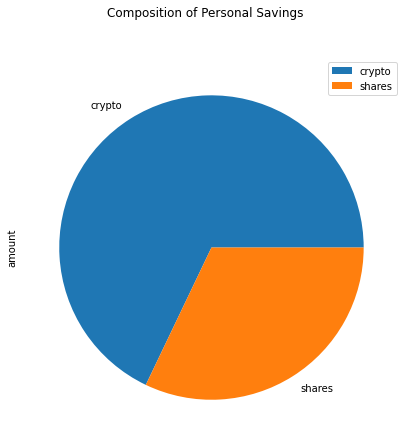

In [12]:
# Plot savings pie chart
df_savings.plot(kind="pie", figsize=(7,7), title="Composition of Personal Savings", subplots=True)
##note for future ref: another way is df_savings.plot.pie()

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings["amount"].sum()
total_savings

# Validate saving health
##Compare total savings and emergency fund. Display appropriate messages
if total_savings > emergency_fund:
    print("Congratulations!! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You just reached the amount advised for your emergency fund.")
else:
    print(f"You are $ {emergency_fund - total_savings} away from completing your emergency fund.")

Congratulations!! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-12-10', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-12-10', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2017-12-21 00:00:00-05:00  108.76  108.8700  108.7300  108.830  2173058   
2017-12-22 00:00:00-05:00  108.82  108.8900  108.8100  108.880  2952430   
2017-12-26 00:00:00-05:00  108.91  109.0100  108.8700  108.960  1717408   
2017-12-27 00:00:00-05:00  109.02  109.3250  109.0200  109.285  1863189   
2017-12-28 00:00:00-05:00  109.22  109.2599  109.1435  109.220  2490982   

                              SPY                                      
                             open     high      low   close    volume  
time                                                                   
2017-12-21 00:00:00-05:00  267.73  268.385  267.300  267.57  34999954  
2017-12-22 00:00:00-05:00  267.60  267.635  266.900  267.48  36604044  
2017-12-26 00:00:00-05:00  267.06  267.390  266.885  267.17  24888478  
2017-12-27 00:00:00-05:00  267.36  267.730  267.010  267.33  32573906  
2017-12-28 00:00:00-05:00  267.85  267.920  267.450  267.86  23583584

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_shares = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_shares.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2017-12-21 00:00:00-05:00  108.76  108.8700  108.7300  108.830  2173058   
2017-12-22 00:00:00-05:00  108.82  108.8900  108.8100  108.880  2952430   
2017-12-26 00:00:00-05:00  108.91  109.0100  108.8700  108.960  1717408   
2017-12-27 00:00:00-05:00  109.02  109.3250  109.0200  109.285  1863189   
2017-12-28 00:00:00-05:00  109.22  109.2599  109.1435  109.220  2490982   

                                           SPY                            \
                          daily_return    open     high      low   close   
time                                                                       
2017-12-21 00:00:00-05:00          NaN  267.73  268.385  267.300  267.57   
2017-12-22 00:00:00-05:00     0.000459  267.60  267.635  266.900  267.48   
2017-12-26 00:00:00-05:00     0.000735  267.06  267.390  266.885  267.17   
2017-12-27 00:00:00-05:00     0.002983  267.36  267.730  267.010  267.33   
2017-12-28 00:00:00-05:00    -0.000595  267.85  267.920  267.450  267.86   

                                                  
                             volume daily_return  
time                                              
2017-12-21 00:00:00-05:00  34999954          NaN  
2017-12-22 00:00:00-05:00  36604044    -0.000336  
2017-12-26 00:00:00-05:00  24888478    -0.001159  
2017-12-27 00:00:00-05:00  32573906     0.000599  
2017-12-28 00:00:00-05:00  23583584     0.001983

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_shares.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995632,1.009001,0.999598,0.997281,1.003624,1.008213,1.007029,0.999229,0.994639,0.994412,...,0.997270,0.990530,1.022222,1.010730,1.005332,1.003953,1.006386,1.001553,0.995491,1.005518
2,1.004579,1.017098,1.016929,0.984219,0.999241,1.004774,0.997621,1.018238,1.000291,0.987285,...,0.998066,0.979874,1.022361,1.017118,1.004423,1.010081,1.003300,0.998432,0.987496,1.015675
3,0.992562,1.017059,1.021326,0.988399,1.003845,1.003299,0.988989,1.021907,0.994336,0.980965,...,0.985161,0.998308,1.031061,1.008272,1.003801,1.007751,1.011601,1.004394,0.980048,1.019955
4,1.002530,1.001875,1.022240,0.976645,1.009555,1.008078,0.990774,1.020913,1.003630,0.980858,...,0.977656,1.004565,1.033964,1.011039,1.009132,1.004334,1.016043,1.011733,0.970059,1.018385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,23.908928,7.281379,4.048120,23.434484,6.356682,22.738615,19.873372,14.191569,6.902513,40.729392,...,39.747628,23.382914,30.271204,7.511888,2.293087,12.767398,2.947210,8.893805,25.207314,19.957376
7557,23.794026,7.317153,4.021296,23.279204,6.406235,22.709617,20.041651,14.261610,6.977642,40.776098,...,39.712576,23.014653,30.405598,7.562867,2.292944,12.603112,2.928190,8.847892,25.283152,20.205652
7558,23.829921,7.345829,3.990349,23.491897,6.375691,22.622714,19.839097,14.336319,6.870869,40.656774,...,40.096241,23.271379,30.018227,7.539426,2.293759,12.546277,2.924887,8.836338,25.247331,19.962541
7559,23.602703,7.267410,3.987504,23.338920,6.407747,22.255854,19.702308,14.301354,6.940148,40.913744,...,39.928846,23.126961,29.697509,7.586013,2.280595,12.481754,2.895114,8.846496,25.651690,20.154743


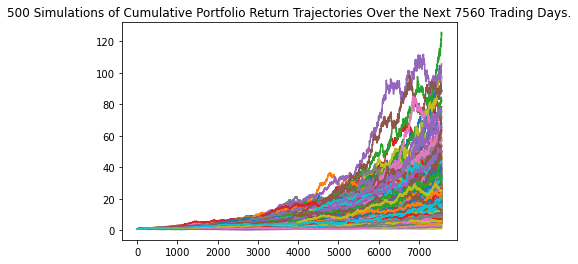

In [19]:
# Plot simulation outcomes
line_plot = MC_shares.plot_simulation()

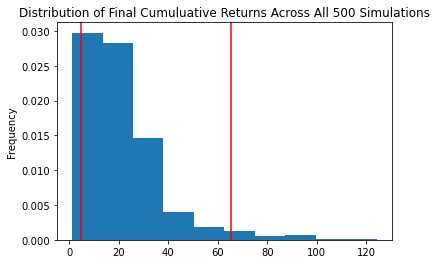

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_shares.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_tbl = MC_shares.summarize_cumulative_return()

# Print summary statistics
print(summary_tbl)

count           500.000000
mean             21.629731
std              16.245994
min               1.131463
25%              10.065150
50%              17.500813
75%              27.249441
max             124.110395
95% CI Lower      4.665657
95% CI Upper     65.188315
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_tbl[8]*initial_investment, 2)
ci_upper = round(summary_tbl[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $93313.13 and $1303766.3


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_tbl[8]*initial_investment, 2)
ci_upper = round(summary_tbl[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $139969.7 and $1955649.46


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

MC_5years.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2017-12-21 00:00:00-05:00  108.76  108.8700  108.7300  108.830  2173058   
2017-12-22 00:00:00-05:00  108.82  108.8900  108.8100  108.880  2952430   
2017-12-26 00:00:00-05:00  108.91  109.0100  108.8700  108.960  1717408   
2017-12-27 00:00:00-05:00  109.02  109.3250  109.0200  109.285  1863189   
2017-12-28 00:00:00-05:00  109.22  109.2599  109.1435  109.220  2490982   

                                           SPY                            \
                          daily_return    open     high      low   close   
time                                                                       
2017-12-21 00:00:00-05:00          NaN  267.73  268.385  267.300  267.57   
2017-12-22 00:00:00-05:00     0.000459  267.60  267.635  266.900  267.48   
2017-12-26 00:00:00-05:00     0.000735  267.06  267.390  266.885  267.17   
2017-12-27 00:00:00-05:00     0.002983  267.36  267.730  267.010  267.33   
2017-12-28 00:00:00-05:00    -0.000595  267.85  267.920  267.450  267.86   

                                                  
                             volume daily_return  
time                                              
2017-12-21 00:00:00-05:00  34999954          NaN  
2017-12-22 00:00:00-05:00  36604044    -0.000336  
2017-12-26 00:00:00-05:00  24888478    -0.001159  
2017-12-27 00:00:00-05:00  32573906     0.000599  
2017-12-28 00:00:00-05:00  23583584     0.001983

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995939,0.992699,0.997312,1.000661,0.993047,1.008225,0.999175,1.010689,0.996753,1.004054,...,1.006754,0.997990,0.995072,1.006611,0.993610,0.996755,0.998975,1.000758,0.991194,0.992735
2,0.994403,0.996174,0.991573,1.005471,0.996762,1.018404,0.995505,1.018311,0.993361,1.008061,...,1.007141,0.977480,0.978081,1.000113,0.987205,1.003981,0.994772,0.995708,0.998361,0.990291
3,0.994789,1.009395,0.996892,1.011864,0.995191,1.017733,0.993754,1.026939,0.998112,1.015802,...,0.990618,0.975197,0.969177,1.008928,0.981557,1.007909,1.002252,0.990788,0.993614,0.989313
4,0.993781,1.015424,1.011530,0.998810,0.997039,1.023381,0.989382,1.022144,0.993331,1.009295,...,1.000544,0.973195,0.969198,1.003032,0.976144,1.013734,1.001216,0.997086,0.993433,0.984530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.262682,2.194117,1.484868,2.159871,1.129039,1.281144,1.575860,2.102740,1.042505,1.875137,...,2.191570,1.870261,2.302611,1.389098,1.229874,1.370385,1.613430,1.397617,1.732642,1.291134
1257,2.282553,2.168916,1.496972,2.131250,1.124266,1.291641,1.581247,2.087280,1.030345,1.861053,...,2.199738,1.871196,2.290620,1.420455,1.244443,1.365869,1.609337,1.400011,1.733795,1.285496
1258,2.272117,2.138205,1.491825,2.117178,1.140883,1.298946,1.571797,2.073431,1.029920,1.878108,...,2.191889,1.877662,2.294403,1.428294,1.224569,1.372063,1.626888,1.388879,1.754864,1.276695
1259,2.264632,2.139446,1.495174,2.134784,1.146072,1.317741,1.549586,2.074417,1.036729,1.865165,...,2.186488,1.892609,2.277512,1.411982,1.243581,1.367750,1.625247,1.384889,1.751953,1.273887


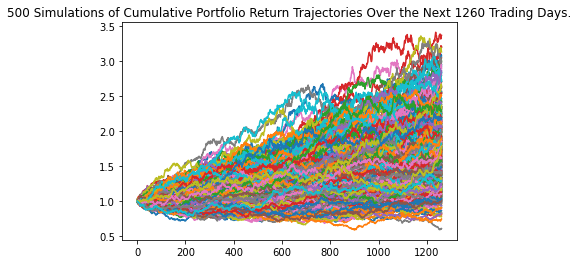

In [26]:
# Plot simulation outcomes
line_plot = MC_5years.plot_simulation()

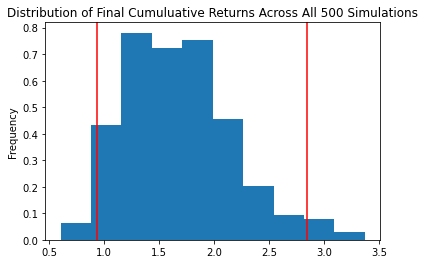

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = MC_5years.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_tbl = MC_5years.summarize_cumulative_return()

# Print summary statistics
print(summary_tbl)

count           500.000000
mean              1.676713
std               0.483176
min               0.604747
25%               1.321299
50%               1.622226
75%               1.971169
max               3.371092
95% CI Lower      0.932944
95% CI Upper      2.842312
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_tbl[8]*initial_investment, 2)
ci_upper_five = round(summary_tbl[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $55976.62 and $170538.73


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# Also change the portfolio ratio to 30/70 for AGG/SPY (riskier)
MC_10years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.30,.70],
    num_simulation = 500,
    num_trading_days = 252*10
)

MC_10years.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2017-12-21 00:00:00-05:00  108.76  108.8700  108.7300  108.830  2173058   
2017-12-22 00:00:00-05:00  108.82  108.8900  108.8100  108.880  2952430   
2017-12-26 00:00:00-05:00  108.91  109.0100  108.8700  108.960  1717408   
2017-12-27 00:00:00-05:00  109.02  109.3250  109.0200  109.285  1863189   
2017-12-28 00:00:00-05:00  109.22  109.2599  109.1435  109.220  2490982   

                                           SPY                            \
                          daily_return    open     high      low   close   
time                                                                       
2017-12-21 00:00:00-05:00          NaN  267.73  268.385  267.300  267.57   
2017-12-22 00:00:00-05:00     0.000459  267.60  267.635  266.900  267.48   
2017-12-26 00:00:00-05:00     0.000735  267.06  267.390  266.885  267.17   
2017-12-27 00:00:00-05:00     0.002983  267.36  267.730  267.010  267.33   
2017-12-28 00:00:00-05:00    -0.000595  267.85  267.920  267.450  267.86   

                                                  
                             volume daily_return  
time                                              
2017-12-21 00:00:00-05:00  34999954          NaN  
2017-12-22 00:00:00-05:00  36604044    -0.000336  
2017-12-26 00:00:00-05:00  24888478    -0.001159  
2017-12-27 00:00:00-05:00  32573906     0.000599  
2017-12-28 00:00:00-05:00  23583584     0.001983

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.016666,0.998336,0.984944,1.005376,0.993181,0.997679,1.020692,0.985863,1.001007,0.999038,...,1.006425,0.995014,0.994860,0.993679,1.020699,1.004383,0.999959,1.002798,1.003954,1.015912
2,1.018427,0.995904,0.982636,1.012655,1.001495,1.002530,1.019222,0.993576,0.998494,0.996196,...,0.998834,1.008973,1.000164,0.989603,1.029147,1.001560,1.016384,1.007181,1.009550,1.015720
3,1.020975,0.982240,0.973823,1.000032,1.008545,1.012067,1.020515,0.984106,1.006872,1.009417,...,1.006310,1.018595,0.991829,0.985031,1.023467,0.998660,1.014812,0.998384,1.013588,1.019572
4,1.030037,0.998620,0.984580,0.994715,1.009692,1.014558,1.025640,0.989659,1.019323,1.020542,...,1.001259,1.009676,0.986143,0.980196,1.039297,1.012637,1.019881,0.996277,1.007471,1.030685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.358015,2.158063,3.447237,2.769405,2.541763,4.488586,6.800856,1.408268,4.041433,5.018595,...,1.959257,3.871375,3.917395,3.545099,1.344963,5.743806,3.700650,5.139032,2.074709,2.880217
2517,2.367974,2.166901,3.409496,2.794302,2.522865,4.472721,6.795589,1.419102,3.988903,5.013860,...,1.963182,3.922713,3.886851,3.589625,1.335689,5.724531,3.685087,5.261788,2.059206,2.865220
2518,2.347119,2.191095,3.391531,2.811275,2.541970,4.486223,6.922382,1.423466,3.912396,5.043637,...,1.918231,3.895478,3.956704,3.553398,1.354013,5.679972,3.643429,5.227203,2.070537,2.901082
2519,2.376318,2.171889,3.420721,2.859672,2.530386,4.471345,6.810468,1.413348,3.963480,5.057677,...,1.947245,3.890345,3.926670,3.595555,1.347837,5.566011,3.709422,5.265240,2.063884,2.952667


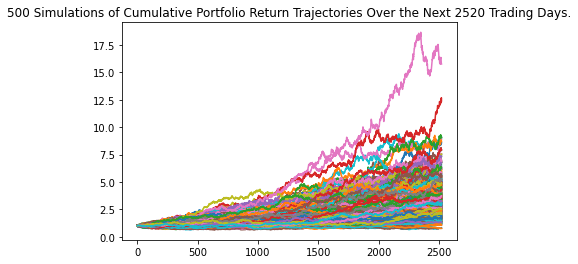

In [32]:
# Plot simulation outcomes
line_plot = MC_10years.plot_simulation()

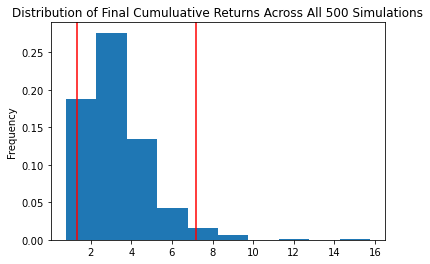

In [33]:
# Plot probability distribution and confidence intervals
dist_plot = MC_10years.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_tbl = MC_10years.summarize_cumulative_return()

# Print summary statistics
print (summary_tbl)

count           500.000000
mean              3.329842
std               1.660230
min               0.770859
25%               2.192851
50%               2.963476
75%               4.120349
max              15.767867
95% CI Lower      1.328943
95% CI Upper      7.168074
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_tbl[8]*initial_investment, 2)
ci_upper_ten = round(summary_tbl[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $79736.57 and $430084.46
